In [8]:
# -----------------------------
# 0) Install & Import Libraries
# -----------------------------
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [13]:
# ================================
# 1) Download & Load Dataset
# ================================

path = "data/"

beneficiary = pd.read_csv(path + "Train_Beneficiarydata-1542865627584.csv")
inpatient = pd.read_csv(path + "Train_Inpatientdata-1542865627584.csv")
outpatient = pd.read_csv(path + "Train_Outpatientdata-1542865627584.csv")
labels = pd.read_csv(path + "Train-1542865627584.csv")

print("Loaded:")
print("Beneficiary:", beneficiary.shape)
print("Inpatient:", inpatient.shape)
print("Outpatient:", outpatient.shape)
print("Labels:", labels.shape)
print("Loaded datasets:")
print("Beneficiary:", beneficiary.shape)
print("Inpatient:", inpatient.shape)
print("Outpatient:", outpatient.shape)
print("Labels:", labels.shape)

# -----------------------------
# 1a) Inspect missing values & types
# -----------------------------
for df_name, df in zip(["Beneficiary","Inpatient","Outpatient","Labels"],
                       [beneficiary,inpatient,outpatient,labels]):
    print(f"\n{df_name} missing values:")
    print(df.isnull().sum())

Loaded:
Beneficiary: (138556, 25)
Inpatient: (40474, 30)
Outpatient: (517737, 27)
Labels: (5410, 2)
Loaded datasets:
Beneficiary: (138556, 25)
Inpatient: (40474, 30)
Outpatient: (517737, 27)
Labels: (5410, 2)

Beneficiary missing values:
BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
Chroni

In [14]:
# ================================
# 2) Data Understanding
# ================================
display(beneficiary.head())
display(inpatient.head())
display(outpatient.head())

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [15]:
# ================================
# 3) Feature Engineering & Aggregation
# ================================
def aggregate_claims(df, prefix):
    g = df.groupby("Provider")
    agg = pd.DataFrame()
    agg[f"{prefix}_total_claims"] = g.size()
    if "BeneID" in df.columns:
        agg[f"{prefix}_unique_bene"] = g["BeneID"].nunique()
    amount_cols = [c for c in df.columns if df[c].dtype in [np.int64, np.float64]
                   and any(x in c.lower() for x in ["paid","amt","charge"])]
    for col in amount_cols[:3]:
        agg[f"{prefix}_sum_{col}"] = g[col].sum()
        agg[f"{prefix}_mean_{col}"] = g[col].mean()
    return agg.fillna(0)

inp_agg = aggregate_claims(inpatient, "inp")
out_agg = aggregate_claims(outpatient, "out")

master = labels.set_index("Provider").join(inp_agg, how="left").join(out_agg, how="left").fillna(0).reset_index()
display(master.head())


,Provider,PotentialFraud,inp_total_claims,inp_unique_bene,inp_sum_InscClaimAmtReimbursed,inp_mean_InscClaimAmtReimbursed,inp_sum_DeductibleAmtPaid,inp_mean_DeductibleAmtPaid,out_total_claims,out_unique_bene,out_sum_InscClaimAmtReimbursed,out_mean_InscClaimAmtReimbursed,out_sum_DeductibleAmtPaid,out_mean_DeductibleAmtPaid
0,PRV51001,No,5.0,5.0,97000.0,19400.000000,5340.0,1068.0,20.0,19.0,7640.0,382.000000,0.0,0.000000
1,PRV51003,Yes,62.0,53.0,573000.0,9241.935484,66216.0,1068.0,70.0,66.0,32670.0,466.714286,70.0,1.000000
2,PRV51004,No,0.0,0.0,0.0,0.000000,0.0,0.0,149.0,138.0,52170.0,350.134228,310.0,2.080537
3,PRV51005,Yes,0.0,0.0,0.0,0.000000,0.0,0.0,1165.0,495.0,280910.0,241.124464,3700.0,3.175966
4,PRV51007,No,3.0,3.0,19000.0,6333.333333,3204.0,1068.0,69.0,56.0,14710.0,213.188406,60.0,0.869565


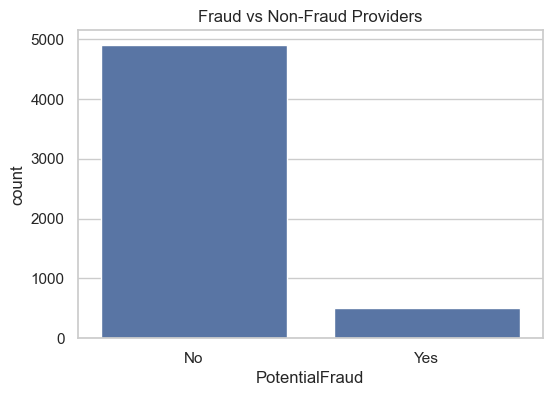

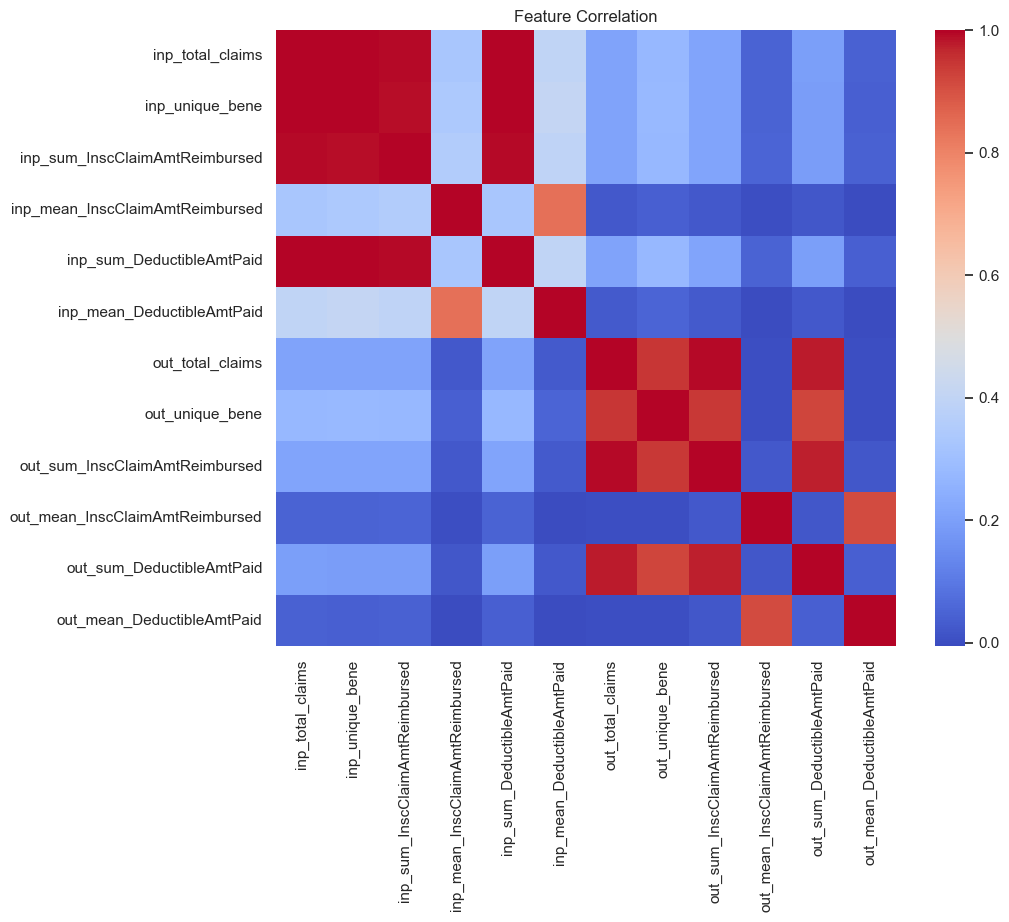

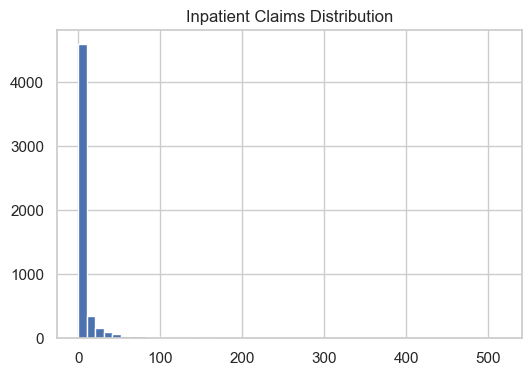

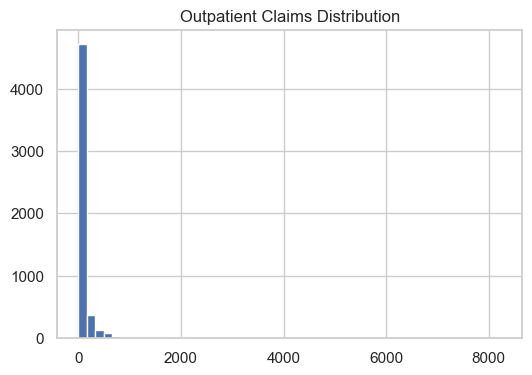

                inp_total_claims  out_total_claims
PotentialFraud                                    
No                      3.481240         66.954119
Yes                    46.249012        374.296443


In [20]:
# ================================
# 4) Exploratory Data Analysis
# ================================

# 1) Target distribution
plt.figure(figsize=(6,4))
sns.countplot(x="PotentialFraud", data=master)
plt.title("Fraud vs Non-Fraud Providers")
plt.show()

# 2) Correlation heatmap  (FIXED)
plt.figure(figsize=(10,8))
sns.heatmap(
    master.drop(columns=["Provider", "PotentialFraud"]).corr(),
    cmap="coolwarm",
    annot=False
)
plt.title("Feature Correlation")
plt.show()

# 3) Claim distributions
plt.figure(figsize=(6,4))
master["inp_total_claims"].hist(bins=50)
plt.title("Inpatient Claims Distribution")
plt.show()

plt.figure(figsize=(6,4))
master["out_total_claims"].hist(bins=50)
plt.title("Outpatient Claims Distribution")
plt.show()

# 4) Fraud vs Non-Fraud mean claims
fraud_summary = master.groupby("PotentialFraud")[
    ["inp_total_claims","out_total_claims"]
].mean()

print(fraud_summary)

In [22]:
# ================================
# Save master dataset for modeling
# ================================
master.to_csv("data/master_dataset.csv", index=False)